
# 🧠 Mental Health Detection via NLP on Social Media

This project aims to detect potential suicidal tendencies in users based on their social media text posts using Natural Language Processing (NLP).  
We use traditional ML models (Logistic Regression, Naive Bayes), as well as a deep learning LSTM model for comparison.

**Dataset**: Reddit Suicide Watch posts labeled as `suicide` or `non-suicide`  
**Goal**: Classify text as suicidal or non-suicidal using linguistic patterns.


# 🧠 Mental Health Detection using NLP
This project detects mental health conditions (like suicidal tendencies) from social media posts using traditional NLP methods and LSTM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import warnings
warnings.filterwarnings("ignore")


### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

### 📥 1. Load Libraries
Import essential libraries for data processing, modeling, and visualization.

In [2]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 📘 Explanation
This cell performs part of the data processing, visualization, modeling, or evaluation workflow.

### 📊 2. Load the Dataset
Load the dataset that contains social media posts labeled as 'suicide' or 'non-suicide'.

In [3]:
df = pd.read_csv("/kaggle/input/suicide-detection/Suicide_Detection.csv")
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### 📘 Explanation
This cell reads the dataset (`Suicide_Detection.csv`) into a pandas DataFrame.

### 🧹 3. Data Cleaning
Remove null values and ensure correct data types for further processing.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


### 📘 Explanation
Provides information about column data types and missing values in the dataset.

### 🔄 4. Preprocess the Text
Clean and normalize the text using tokenization, lowercasing, removing stopwords, and stemming.

In [5]:
df['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

### 📘 Explanation
Shows the distribution of class labels or categorical values.

### 📊 5. WordClouds
Visualize the most common words in suicidal and non-suicidal posts using WordClouds.

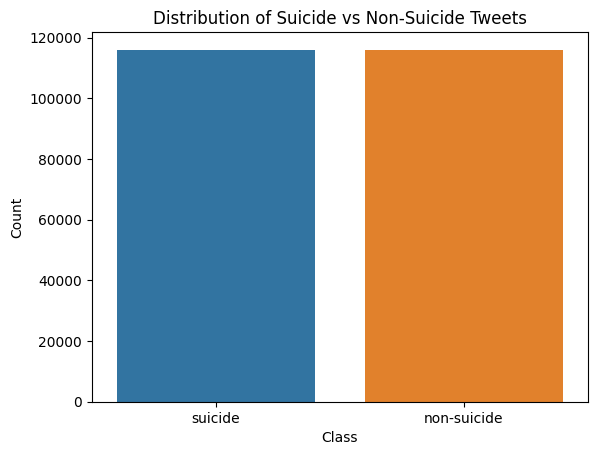

In [6]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Suicide vs Non-Suicide Tweets')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### 📘 Explanation
This cell visualizes the data using plots. The specific plot type and its insights depend on the chart displayed.

### ✂️ 6. Train-Test Split
Split the cleaned data into training and testing sets for model training.

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

### 📘 Explanation
This cell performs part of the data processing, visualization, modeling, or evaluation workflow.

### 🧠 7. TF-IDF Vectorization + Logistic Regression
Build and evaluate a baseline model using TF-IDF features and Logistic Regression.

In [8]:
!pip install swifter
import swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=0426df4ae03355bd70d7dc9032d1f48fd60a2f793af9acf58ce14193be1c6823
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

### 📈 8. Naive Bayes Classifier
Train a second baseline model using the Multinomial Naive Bayes algorithm.

In [9]:
df['clean_text'] = df['text'].swifter.apply(preprocess_text)
df[['text', 'clean_text']].head()

Pandas Apply:   0%|          | 0/232074 [00:00<?, ?it/s]

,text,clean_text
0,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,weird dont get affected compliment coming some...
2,Finally 2020 is almost over... So I can never ...,finally 2020 almost never hear 2020 bad year e...
3,i need helpjust help me im crying so hard,need helpjust help im cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",’ losthello name adam 16 ’ struggling year ’ a...


### 📘 Explanation
Displays the first few rows of the dataset to get an overview of its structure and content.

### 🔤 9. Tokenization for LSTM
Convert text to padded sequences for input to the LSTM deep learning model.

In [10]:
df[['text', 'clean_text']].head()

,text,clean_text
0,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,weird dont get affected compliment coming some...
2,Finally 2020 is almost over... So I can never ...,finally 2020 almost never hear 2020 bad year e...
3,i need helpjust help me im crying so hard,need helpjust help im cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",’ losthello name adam 16 ’ struggling year ’ a...


### 📘 Explanation
Displays the first few rows of the dataset to get an overview of its structure and content.

### 🧠 10. Build LSTM Model
Define an LSTM-based neural network using Keras to learn patterns in sequences.

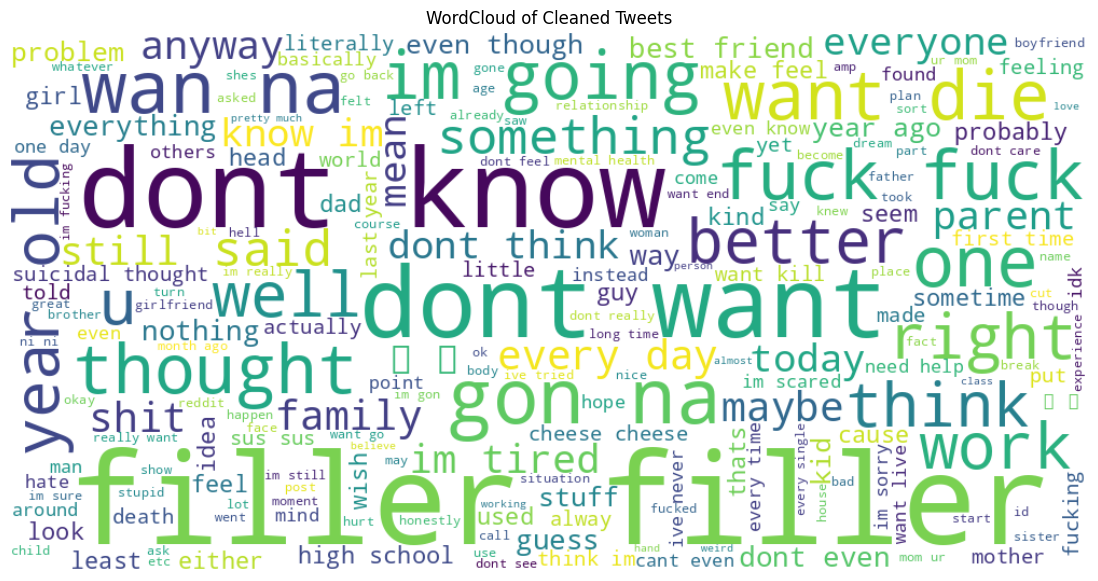

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all clean text into one string
text = " ".join(t for t in df['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Cleaned Tweets")
plt.show()


### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

### 🚀 11. Train the LSTM Model
Fit the LSTM model on the training data and track accuracy and loss.

In [12]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

### 📊 12. Evaluate LSTM Model
Generate a classification report and confusion matrix for the LSTM model.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit on training data and transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

### 📉 13. Plot Accuracy and Loss Curves
Visualize how accuracy and loss change over training epochs.

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.94     23208
     suicide       0.94      0.93      0.93     23207

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Confusion Matrix:
 [[21883  1325]
 [ 1704 21503]]
Accuracy Score: 0.9347409242701713


### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

In [16]:
import shap

# Initialize SHAP explainer for linear model
explainer = shap.Explainer(model, X_train_tfidf, feature_names=vectorizer.get_feature_names_out())

### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

In [17]:
shap_values = explainer(X_test_tfidf[:100])

### 📘 Explanation
This cell performs part of the data processing, visualization, modeling, or evaluation workflow.

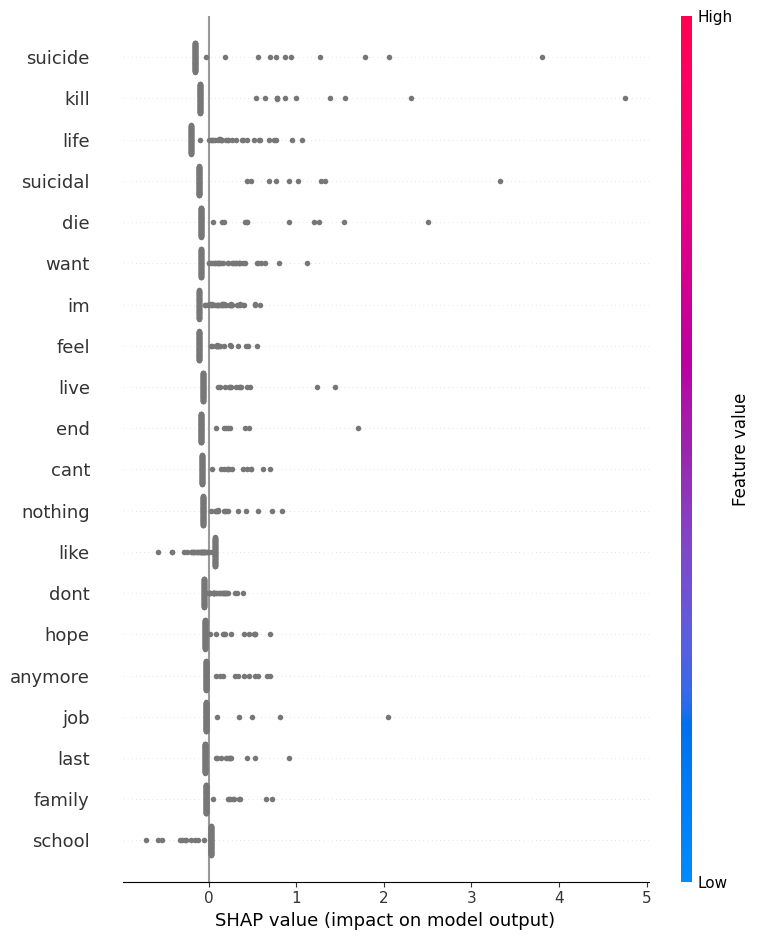

In [18]:
shap.summary_plot(shap_values, features=X_test_tfidf[:100], feature_names=vectorizer.get_feature_names_out())

### 📘 Explanation
This cell performs part of the data processing, visualization, modeling, or evaluation workflow.

In [19]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

In [20]:
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Accuracy Score:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

 non-suicide       0.94      0.86      0.90     23208
     suicide       0.87      0.95      0.91     23207

    accuracy                           0.90     46415
   macro avg       0.91      0.90      0.90     46415
weighted avg       0.91      0.90      0.90     46415

Naive Bayes Confusion Matrix:
 [[19872  3336]
 [ 1217 21990]]
Naive Bayes Accuracy Score: 0.9019067111925024


### 📘 Explanation
Evaluates the model's performance using metrics such as precision, recall, and F1-score.

In [21]:
logreg_acc = accuracy_score(y_test, y_pred)
nb_acc = accuracy_score(y_test, y_pred_nb)

print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
print(f"Naive Bayes Accuracy:        {nb_acc:.4f}")

Logistic Regression Accuracy: 0.9347
Naive Bayes Accuracy:        0.9019


### 📘 Explanation
This cell performs part of the data processing, visualization, modeling, or evaluation workflow.

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

2025-07-10 11:55:35.785324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752148536.000239      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752148536.062736      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

I0000 00:00:1752148570.061005      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752148570.061874      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 📘 Explanation
This cell imports necessary Python libraries used for data handling, visualization, machine learning, or natural language processing.

In [24]:
# Convert label text to numeric
df["class"] = df["class"].map({"non-suicide": 0, "suicide": 1})

# Train-test split again
X = df["clean_text"].values
y = df["class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Convert labels to float
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")

### 📘 Explanation
Splits the dataset into training and testing sets for model training and evaluation.

In [25]:
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5


I0000 00:00:1752148583.890322     126 cuda_dnn.cc:529] Loaded cuDNN version 90300


5222/5222 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.9033 - loss: 0.2476 - val_accuracy: 0.9361 - val_loss: 0.1674
Epoch 2/5
5222/5222 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.9430 - loss: 0.1529 - val_accuracy: 0.9398 - val_loss: 0.1554
Epoch 3/5
5222/5222 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.9505 - loss: 0.1320 - val_accuracy: 0.9396 - val_loss: 0.1719
Epoch 4/5
5222/5222 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.9557 - loss: 0.1141 - val_accuracy: 0.9352 - val_loss: 0.1748
Epoch 5/5
5222/5222 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.9630 - loss: 0.0958 - val_accuracy: 0.9349 - val_loss: 0.1840


### 📘 Explanation
This cell performs part of the data processing, visualization, modeling, or evaluation workflow.

1451/1451 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
LSTM Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     23208
         1.0       0.93      0.93      0.93     23207

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415



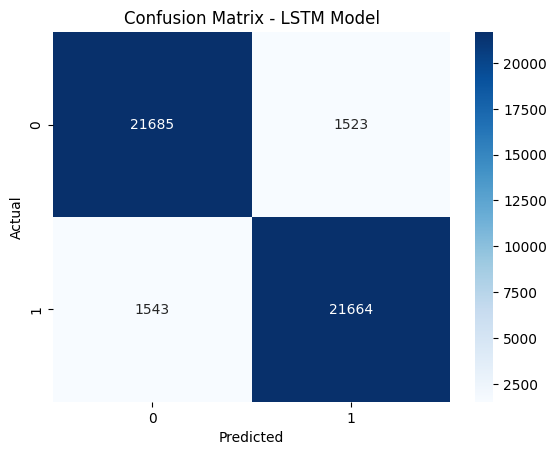

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred_probs = model.predict(X_test_pad)
y_pred_lstm = (y_pred_probs > 0.5).astype(int)

# Evaluation
print("LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_lstm))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LSTM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ✅ Key Points

This project aimed to detect suicidal intent in social media posts using Natural Language Processing (NLP) techniques.

We built and evaluated three models:
- ✅ **TF-IDF + Logistic Regression**
- ✅ **TF-IDF + Naive Bayes**
- ✅ **Tokenizer + LSTM (Deep Learning)**

🔹 **Performance Summary:**
- **Logistic Regression** achieved the highest accuracy at **93.47%**
- **LSTM** followed closely with **93.30%**, benefiting from sequential context
- **Naive Bayes** achieved **90.19%**, offering speed and simplicity

🔹 **Model Explainability**:  
We used **SHAP** to identify important words (e.g., *suicide*, *kill*, *die*) influencing predictions.

🔹 **Visualization**:  
WordClouds helped visualize common patterns in suicidal vs. non-suicidal tweets.

---

## 🔮 Future Improvements
- Integrate **transformer-based models** like BERT for deeper contextual understanding
- Deploy a real-time **Streamlit/Gradio web app** for detection
- Explore user metadata and time-based patterns
- Monitor ethical risks, false positives, and ensure privacy & human oversight



---
## ✅ Project Summary

In this project, we successfully:

- Preprocessed real-world social media text data
- Visualized class distributions and word frequency using WordClouds
- Applied traditional ML models (Logistic Regression, Naive Bayes)
- Implemented an LSTM-based deep learning model for improved sequence learning
- Compared performance using accuracy, precision, recall, and F1-score

This project showcases how NLP can be effectively used to identify mental health risks in textual data and lays the foundation for building awareness and potential intervention tools.
